In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from statsmodels.graphics.mosaicplot import mosaic

The dataset is composed of beer reviews from 2 diffent websites:

- [BeerAdvocate](https://www.beeradvocate.com/beer/top-rated/)
- [RateBeer](https://www.ratebeer.com/beer/top-50/)

In the different folder you will find the data for each website. The data is composed of 3 files:

- `beers.csv`: contains the information about the beers
- `breweries.csv`: contains the information about the breweries
- `reviews.csv`: contains the reviews of the beers

The data was collected in 2018.
There is also a `matched_beer_data` folder that contains the data of the beers that were matched between the two websites.

# Data description

## Loading the data

In [8]:
beers_BA = pd.read_csv("./dataset_BeerReviews/BeerAdvocate/beers.csv")
breweries_BA = pd.read_csv("./dataset_BeerReviews/BeerAdvocate/breweries.csv")
users_BA = pd.read_csv("./dataset_BeerReviews/BeerAdvocate/users.csv")

beers_RB = pd.read_csv("./dataset_BeerReviews/RateBeer/beers.csv")
breweries_RB = pd.read_csv("./dataset_BeerReviews/RateBeer/breweries.csv")
users_RB = pd.read_csv("./dataset_BeerReviews/RateBeer/users.csv")

## Geometric description

### BeerAdvocate

#### Beers

In [9]:
beers_BA.head()

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
0,166064,Nashe Moskovskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.7,NaN,NaN,0,NaN
1,166065,Nashe Pivovskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,3.8,NaN,NaN,0,NaN
2,166066,Nashe Shakhterskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.8,NaN,NaN,0,NaN
3,166067,Nashe Zhigulevskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.0,NaN,NaN,0,NaN
4,166063,Zhivoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.5,NaN,NaN,0,NaN


##### Study of the different scorings

In [25]:
beers_BA_scores = beers_BA.drop(columns=['beer_id', 'beer_name', 'brewery_id', 'brewery_name', 'style']) # Keeping only the scores
beers_BA_scores = beers_BA_scores[beers_BA_scores['nbr_ratings'] != 0] # Removing beers with no ratings
beers_BA_scores.drop(columns=['nbr_ratings', 'nbr_reviews', 'abv'], inplace=True) # Removing the number of rating an reviews + degree of alcohol column
beers_BA_scores.drop(columns=['nbr_matched_valid_ratings', 'avg_matched_valid_ratings'], inplace=True) # Removing matched data
beers_BA_scores.head()

,avg,ba_score,bros_score,avg_computed,zscore
23,2.88,NaN,NaN,2.880000,NaN
24,3.85,NaN,NaN,3.845000,NaN
25,3.45,80.0,80.0,3.439867,-0.649167
26,3.86,NaN,NaN,3.888750,0.093110
27,3.56,82.0,90.0,3.556094,-0.478579


Summary statistics of the different scorings:

In [26]:
beers_BA_scores.describe()

,avg,ba_score,bros_score,avg_computed,zscore
count,247982.000000,61199.000000,5702.000000,247982.000000,40285.000000
mean,3.721189,84.633278,84.806559,3.717594,-0.408295
std,0.475414,4.052756,10.507735,0.464248,0.806491
min,0.000000,46.000000,31.000000,1.000000,-6.655704
25%,3.500000,83.000000,81.000000,3.500000,-0.785424
50%,3.780000,85.000000,87.000000,3.770000,-0.321596
75%,4.010000,86.000000,91.000000,4.000000,0.086733
max,5.000000,100.000000,100.000000,5.000000,2.211576


In [41]:
print("Number of NaN values in each column:")
print(beers_BA_scores.isna().sum())

Number of NaN values in each column:
avg                  0
ba_score        186783
bros_score      242280
avg_computed         0
zscore          207697
dtype: int64


Correlation between the different scorings

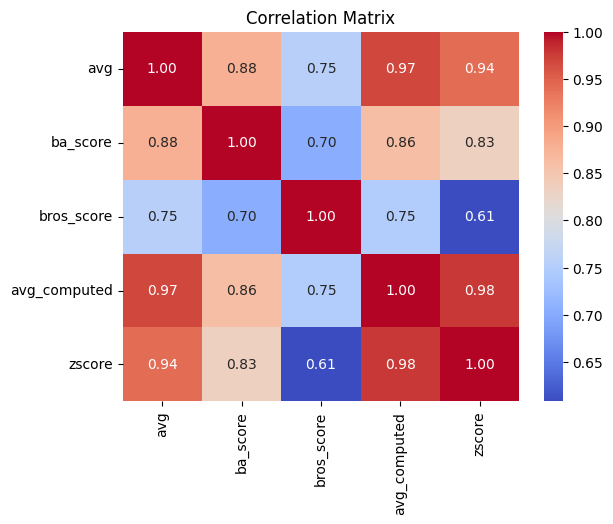

In [ ]:
correlation_matrix = beers_BA_scores.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Since there is a strong correlation between 'avg', 'avg_computed' & 'zscore' we will remove 2 of the three for further investigation

Distribution of the different scorings

In [38]:
beers_BA_scores_PC = beers_BA_scores[['ba_score', 'bros_score']]

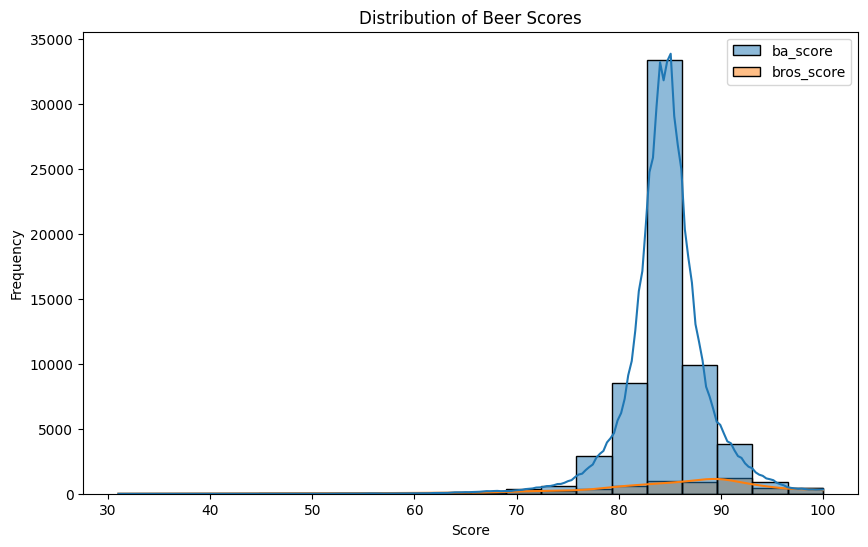

In [39]:
plt.figure(figsize=(10, 6))
sns.histplot(beers_BA_scores_PC, bins=20, kde=True)
plt.title('Distribution of Beer Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

Boxplots

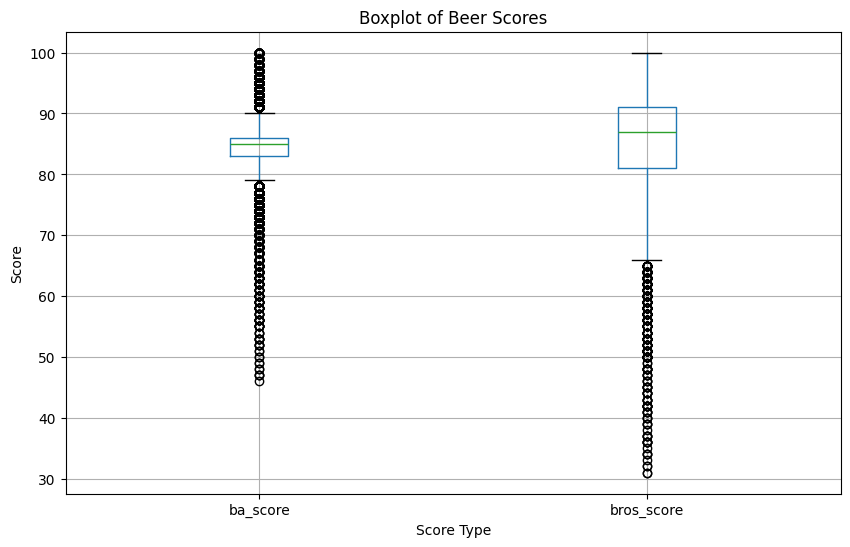

In [40]:
plt.figure(figsize=(10, 6))
beers_BA_scores_PC.boxplot()
plt.title('Boxplot of Beer Scores')
plt.xlabel('Score Type')
plt.ylabel('Score')
plt.show()


In [13]:
# Perform a geometric description of the dataset
print("BeerAdvocate dataset")
print("The DataFrame has {} rows and {} columns".format(beers_BA.shape[0], beers_BA.shape[1]))
print("Number unique of beers: ", beers_BA['beer_id'].nunique())

BeerAdvocate dataset
The DataFrame has 280823 rows and 15 columns
Number unique of beers:  280823


#### Breweries

In [14]:
breweries_BA.head()

,id,location,name,nbr_beers
0,39912,Kyrgyzstan,Abdysh-Ata (Абдыш Ата),5
1,39913,Kyrgyzstan,Arpa (АРПА),1
2,39914,Kyrgyzstan,Bear Beer,4
3,39915,Kyrgyzstan,Blonder Pub,4
4,39916,Kyrgyzstan,Kellers Bier,2


In [15]:
# Perform a geometric description of the dataset
print("BeerAdvocate dataset")
print("The DataFrame has {} rows and {} columns".format(breweries_BA.shape[0], breweries_BA.shape[1]))
print("Number unique of beers: ", breweries_BA['id'].nunique())

BeerAdvocate dataset
The DataFrame has 16758 rows and 4 columns
Number unique of beers:  16758


#### Users

In [16]:
users_BA.head()

,nbr_ratings,nbr_reviews,user_id,user_name,joined,location
0,7820,465,nmann08.184925,nmann08,1.199704e+09,"United States, Washington"
1,2521,2504,stjamesgate.163714,StJamesGate,1.191838e+09,"United States, New York"
2,1797,1143,mdagnew.19527,mdagnew,1.116410e+09,Northern Ireland
3,31,31,helloloser12345.10867,helloloser12345,1.101380e+09,Northern Ireland
4,604,604,cypressbob.3708,cypressbob,1.069326e+09,Northern Ireland


In [17]:
# Perform a geometric description of the dataset
print("BeerAdvocate dataset")
print("The DataFrame has {} rows and {} columns".format(breweries_BA.shape[0], breweries_BA.shape[1]))
print("Number unique of beers: ", breweries_BA['id'].nunique())

BeerAdvocate dataset
The DataFrame has 16758 rows and 4 columns
Number unique of beers:  16758


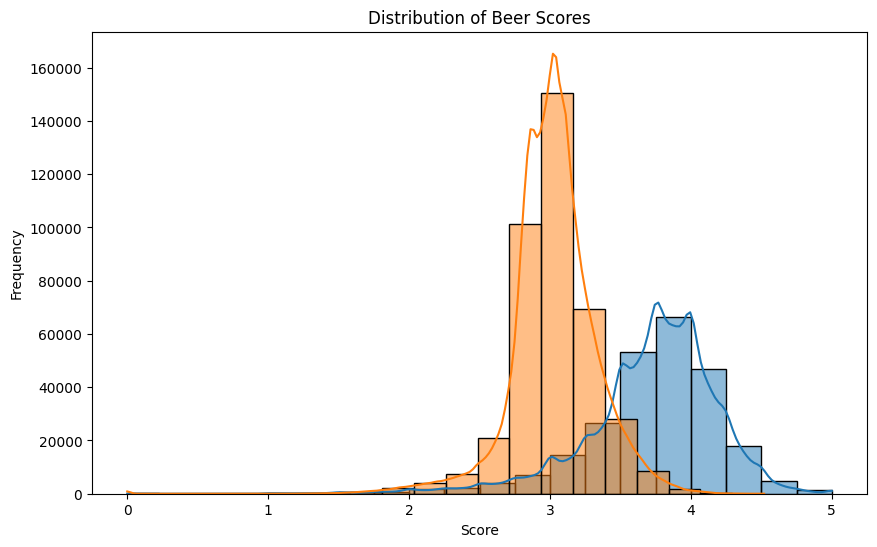

In [42]:
plt.figure(figsize=(10, 6))
sns.histplot(beers_BA['avg'], bins=20, kde=True)
sns.histplot(beers_RB['avg'], bins=20, kde=True)
plt.title('Distribution of Beer Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

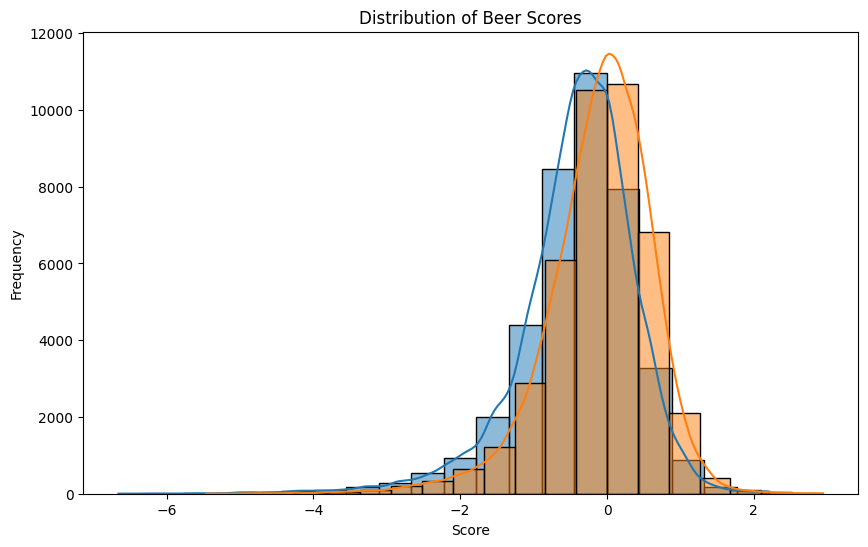

In [43]:
plt.figure(figsize=(10, 6))
sns.histplot(beers_BA['zscore'], bins=20, kde=True)
sns.histplot(beers_RB['zscore'], bins=20, kde=True)
plt.title('Distribution of Beer Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

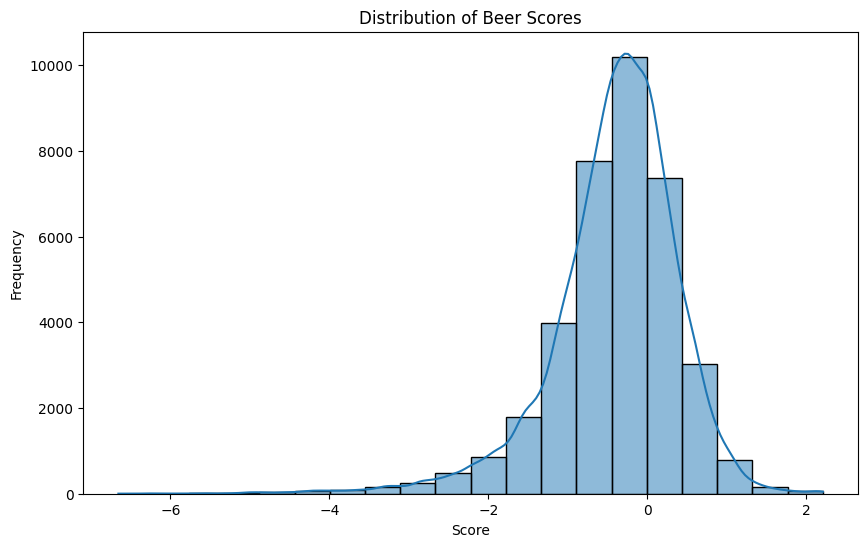

In [47]:
# group zscores by beer name
beers_BA_zscore = beers_BA.groupby('beer_name')['zscore'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.histplot(beers_BA_zscore['zscore'], bins=20, kde=True)
plt.title('Distribution of Beer Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

In [53]:
beers_BA

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
0,166064,Nashe Moskovskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.7,NaN,NaN,0,NaN
1,166065,Nashe Pivovskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,3.8,NaN,NaN,0,NaN
2,166066,Nashe Shakhterskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.8,NaN,NaN,0,NaN
3,166067,Nashe Zhigulevskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.0,NaN,NaN,0,NaN
4,166063,Zhivoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.5,NaN,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280818,19139,Kölsch Ale,885,Summit Station Restaurant & Brewery,Kölsch,3,3,2.71,NaN,NaN,5.0,2.713333,NaN,0,NaN
280819,19140,Nut Brown Ale,885,Summit Station Restaurant & Brewery,English Brown Ale,2,1,3.10,NaN,NaN,5.3,3.250000,NaN,0,NaN
280820,19146,Octoberfest,885,Summit Station Restaurant & Brewery,Märzen / Oktoberfest,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
280821,2805,Scotch Ale,885,Summit Station Restaurant & Brewery,Scotch Ale / Wee Heavy,0,0,NaN,NaN,NaN,7.0,NaN,NaN,0,NaN
